# <center><span style="color:black"> Homework II - Statistical learning and Big data </style></center>
##  <center><span style="color:black"> Student : Khalil ZLAOUI </style></center>

# Question 1

### Question A

A Hyperplane in 2 dimensions is just a line.
The hyperplane satisfies $1+3X_{1}-X_{2}=0$, i.e. $X_{2}=1+3X_{1}$.

We can easily plot this line in R. Two points in this hyperplane (line) are $(X_{1},X_{2})=(1;4)$ and $(X_{1},X_{2})=(0;1)$. Let's plot them along the hyperplane, in plain red.

The set of points satisfying $1+3X_{1}-X_{2}>0$ are at the right side of the line. For example, the point (2,2) which satisfies $1+3*2-2=5>0$ is plotted in red (square), at the right side of the line.

The set of points satisfying $1+3X_{1}-X_{2}<0$ are at the left side of the line. For example, the point (1,5) which satisfies $1+3*1-5=-1<0$ is plotted in red (circle), at the left side of the line.

### Question B

The set of points satisfying $-2+X_{1}+2X_{2}>0$ are above the blue line. For example, the point (0,3) which satisfies $-2+0+2*3=4>0$ is plotted in blue (square), above the line.

The set of points satisfying $-2+X_{1}+2X_{2}<0$ are below the blue line. For example, the point (1,0) which satisfies $-2+1+0=-1<0$ is plotted in blue (circle), below the line.

### Plot 

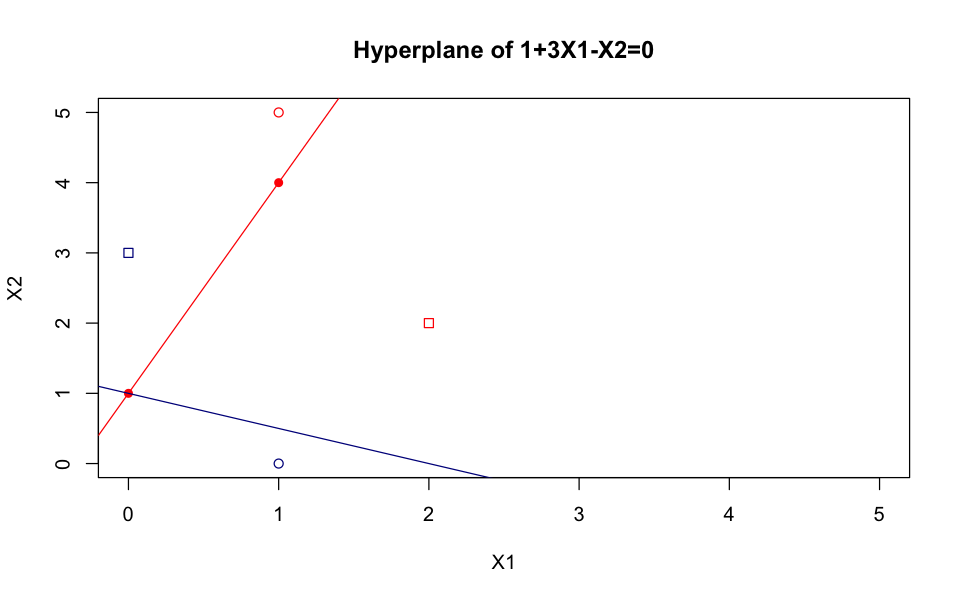

In [7]:
# Question (A)

options(repr.plot.width=8, repr.plot.height=5)


plot(c(0,1),c(1,4),ylim=c(0,5),xlim=c(0,5),ylab="X2",xlab="X1",main="Hyperplane of 1+3X1-X2=0",col="red",pch=16)
abline(1,3,col="red")
points(2,2, col="red",pch=0)
points(1,5, col="red",pch=1)

# Quesiton (B)
abline(1,-1/2,col="darkblue")
points(0,3,col="darkblue",pch=0)
points(1,0,col="darkblue",pch=1)


# Question 2

### Question A and B

This is the equation of a circle:

$(X_{1}-(-1))^2+(X_{2}-2)^2=2^2$

of which the center is (-1;2) and the radius is 2.

In [12]:
library(plotrix)

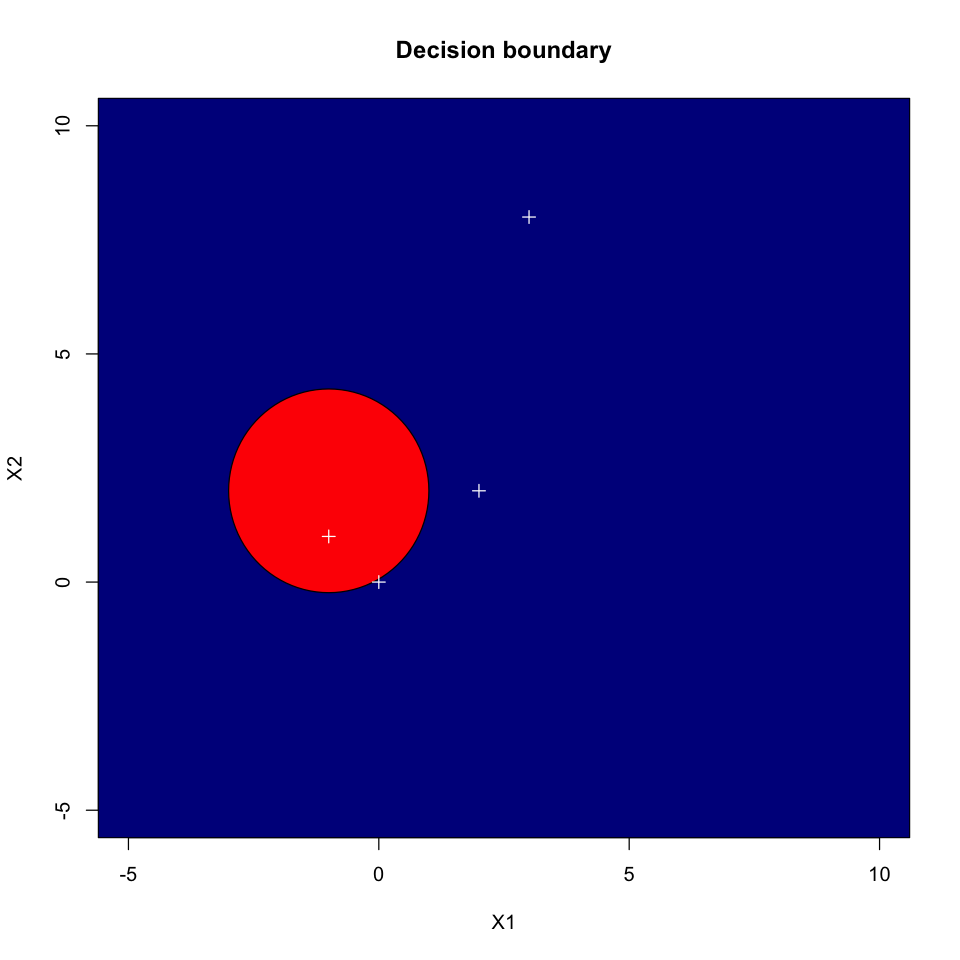

In [13]:
options(repr.plot.width=8, repr.plot.height=8)

plot(NULL,ylim=c(-5,10),xlim=c(-5,10),ylab="X2",xlab="X1",main="Decision boundary")
rect(par("usr")[1],par("usr")[3],par("usr")[2],par("usr")[4],col = "Darkblue")
draw.circle(-1,2,2,border="black",col="red",lty=1,angle=30,lwd=1)
points(0,0,col="white",pch=3)
points(-1,1,col="white",pch=3)
points(2,2,col="white",pch=3)
points(3,8,col="white",pch=3)

The set of points for which $(1+X_{1})^2+(2-X_{2})^2>4$ are strictly outside the circle, which area is represented in blue. The set of points for which $(1+X_{1})^2+(2-X_{2})^2\leq4$ are on or inside the circle, which is represented in red.

### Question C

In [14]:
(1+0)^2+(2-0)^2
(1+(-1))^2+(2-1)^2
(1+2)^2+(2-2)^2
(1+3)^2+(2-8)^2

[1] 5

[1] 1

[1] 9

[1] 52

(0,0),(2,2), (3,8) are outside the circle, in the blue class.

(-1,1) is inside the circle, in the red class.

### Question D

We just need to develop the expression $(1+X_{1})^2+(2-X_{2})^2-4=0$ to obtain $1+2X_{1}+X_{1}^2+4-4X_{2}+X_{2}^2-4=0$

# Question 5

### Question A

In [1]:
set.seed(1)
x1=runif(500)-0.5
set.seed(2)
x2=runif(500)-0.5
y=(1*(x1^2-x2^2 > 0))
Dat=as.data.frame(cbind(y,x1,x2))
Dat$y<-as.factor(Dat$y)
summary(Dat)

 y             x1                  x2           
 0:269   Min.   :-0.498163   Min.   :-0.499337  
 1:231   1st Qu.:-0.241871   1st Qu.:-0.285145  
         Median :-0.023730   Median :-0.011586  
         Mean   :-0.004345   Mean   :-0.005923  
         3rd Qu.: 0.234146   3rd Qu.: 0.264287  
         Max.   : 0.496077   Max.   : 0.498064  

### Question B

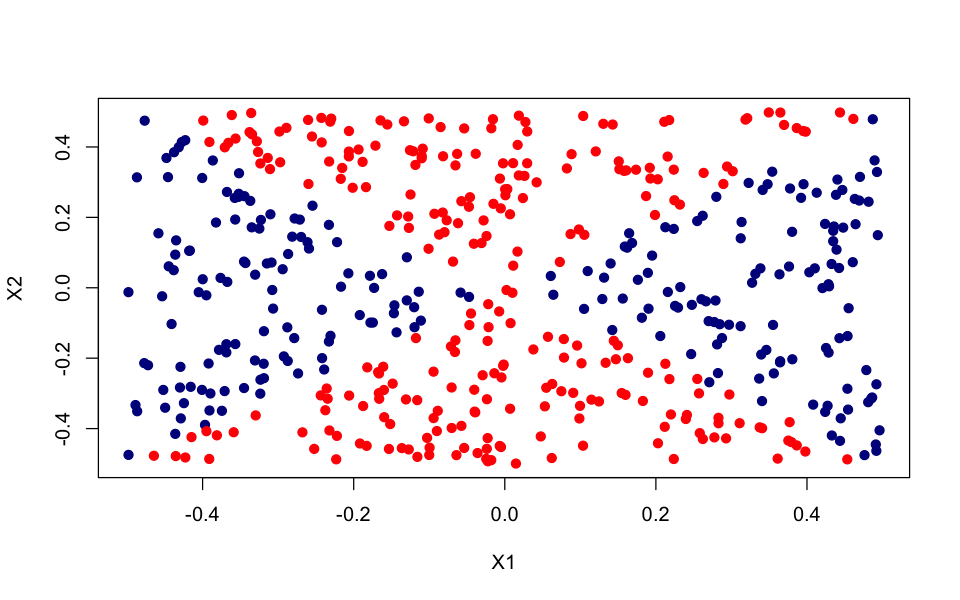

In [26]:
options(repr.plot.width=8, repr.plot.height=5)
plot(x1,x2,col = ifelse(x1^2-x2^2 > 0,'darkblue','red'), pch = 19,xlab="X1",ylab="X2")

### Question C

In [27]:
linear.log.fit <- glm(y~x1+x2,data=Dat,family="binomial")
summary(linear.log.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial", data = Dat)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.192  -1.116  -1.059   1.234   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.15256    0.08981  -1.699   0.0894 .
x1           0.22890    0.31739   0.721   0.4708  
x2          -0.16885    0.29863  -0.565   0.5718  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 690.26  on 499  degrees of freedom
Residual deviance: 689.39  on 497  degrees of freedom
AIC: 695.39

Number of Fisher Scoring iterations: 3


### Question D

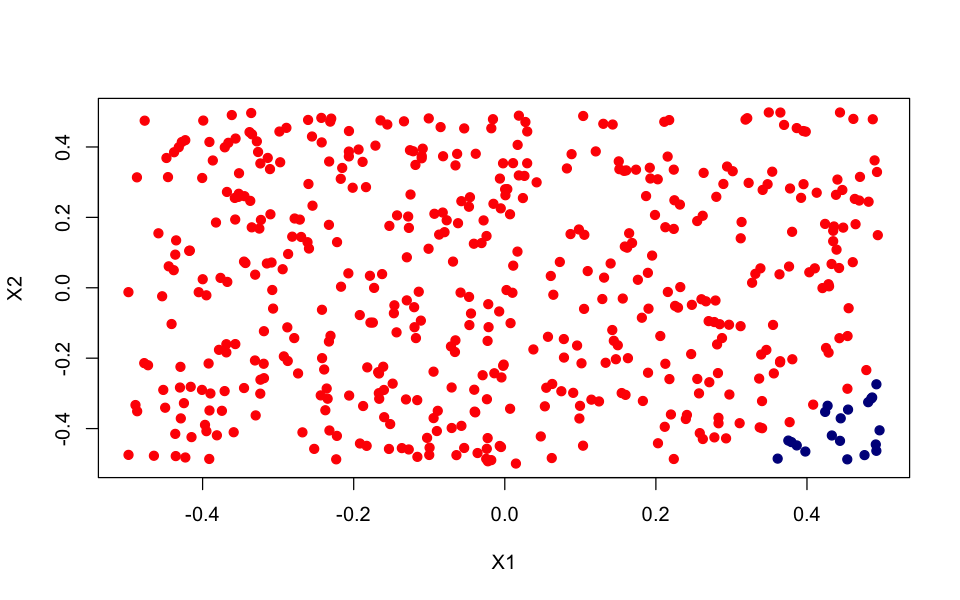

In [28]:
y.linearlog.predict<-predict(linear.log.fit,type="response")
y.linearlog.predict<-ifelse(y.linearlog.predict>0.5,1,0)

plot(x1,x2,col = ifelse(y.linearlog.predict > 0,'darkblue','red'), pch = 19,xlab="X1",ylab="X2")

### Question E

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = y ~ x1 + x2 + x1.sqr + x2.sqr, family = "binomial", 
    data = Dat, control = list(maxit = 200))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.260e-05  -2.110e-08  -2.110e-08   2.110e-08   2.293e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.148e+01  3.916e+04  -0.001    1.000
x1          -1.370e+02  4.491e+05   0.000    1.000
x2          -7.766e+01  7.559e+05   0.000    1.000
x1.sqr       2.224e+04  2.150e+07   0.001    0.999
x2.sqr      -2.177e+04  2.103e+07  -0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9026e+02  on 499  degrees of freedom
Residual deviance: 1.2369e-09  on 495  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 34


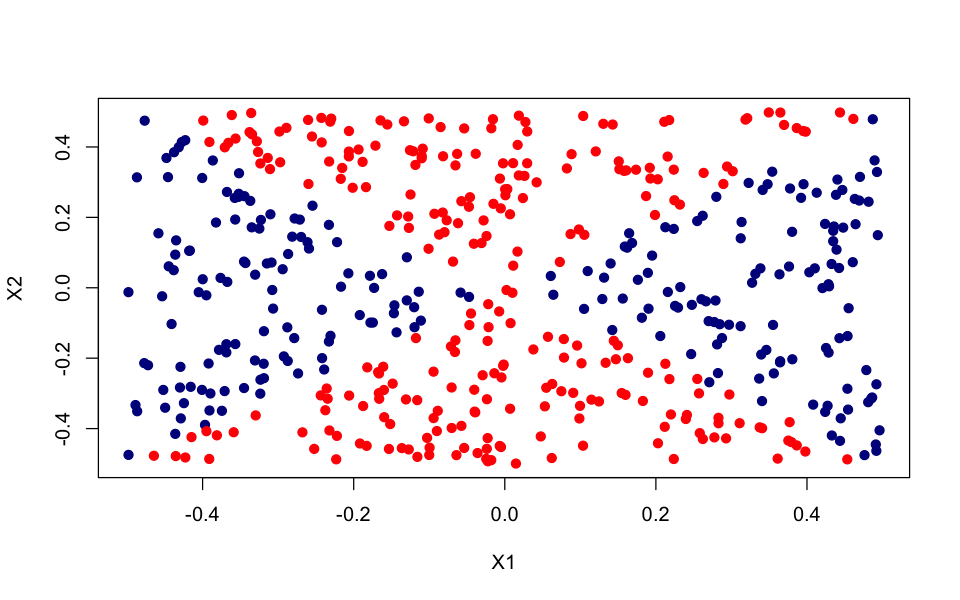

In [29]:
x1.sqr<-x1^2
x2.sqr<-x2^2


non.linear.log.fit <- glm(y~x1+x2+x1.sqr+x2.sqr,data=Dat,family="binomial",control = list(maxit = 200))
summary(non.linear.log.fit)

y.non.linearlog.predict<-predict(non.linear.log.fit,type="response")
y.non.linearlog.predict<-ifelse(y.non.linearlog.predict>0.5,1,0)
plot(x1,x2,col = ifelse(y.non.linearlog.predict > 0,'darkblue','red'), pch = 19,xlab="X1",ylab="X2")

### Question G

We start by selecting tuning parameters using cross-validation on the training data. We will stick to training data, as suggested by the question.

In [30]:
library(e1071)
tune.out<-tune(svm, y~., data=Dat, kernel="linear",
              ranges=list(cost=c(0.1,1,10,100,1000)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.462 

- Detailed performance results:
   cost error dispersion
1 1e-01 0.462 0.09016035
2 1e+00 0.462 0.09016035
3 1e+01 0.462 0.09016035
4 1e+02 0.462 0.09016035
5 1e+03 0.462 0.09016035


       truth
predict   0   1
      0 269 231
      1   0   0

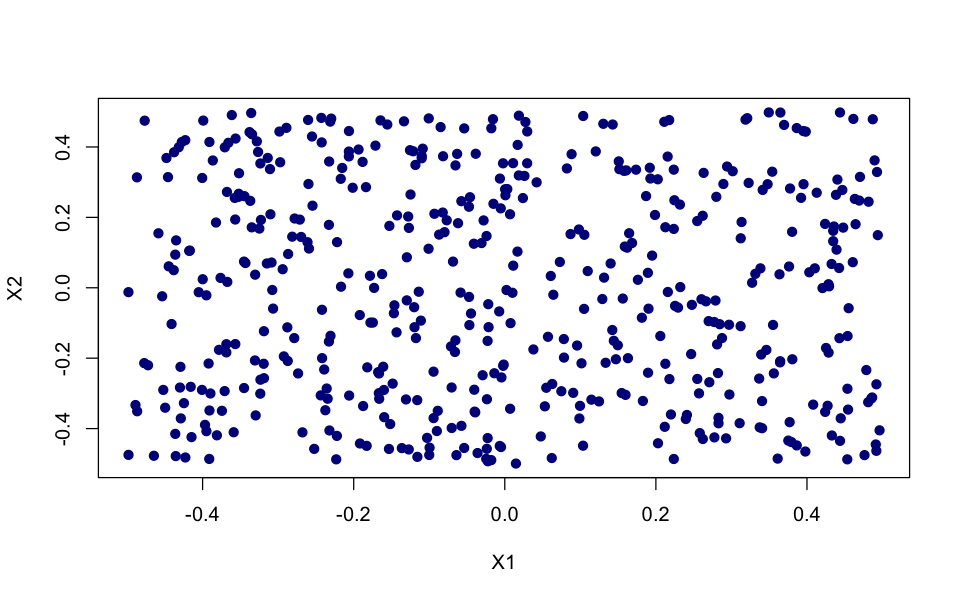

In [34]:
supp.vector<-svm(y~.,data=Dat,kernel="linear",cost=0.1,scale=FALSE)
ypred=predict(supp.vector,Dat)
table(predict=ypred,truth=Dat$y)

plot(x1,x2,col = ifelse(ypred == 0,'darkblue','red'), pch = 19,xlab="X1",ylab="X2")

We see that all observations are classified in one class.

### Question H

In [36]:
tune.out.2<-tune(svm, y~., data=Dat, kernel="radial",
              ranges=list(cost=c(0.1,1,10,100,1000,10000,100000),
                          gamma=c(0.5,1,2,3,4)))
summary(tune.out.2)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
 1000   0.5

- best performance: 0.006 

- Detailed performance results:
    cost gamma error  dispersion
1  1e-01   0.5 0.072 0.025298221
2  1e+00   0.5 0.038 0.027406406
3  1e+01   0.5 0.028 0.023475756
4  1e+02   0.5 0.016 0.015776213
5  1e+03   0.5 0.006 0.009660918
6  1e+04   0.5 0.014 0.016465452
7  1e+05   0.5 0.014 0.016465452
8  1e-01   1.0 0.068 0.023475756
9  1e+00   1.0 0.040 0.021081851
10 1e+01   1.0 0.026 0.026749870
11 1e+02   1.0 0.018 0.017511901
12 1e+03   1.0 0.018 0.022010099
13 1e+04   1.0 0.014 0.016465452
14 1e+05   1.0 0.014 0.016465452
15 1e-01   2.0 0.062 0.030477679
16 1e+00   2.0 0.032 0.026997942
17 1e+01   2.0 0.036 0.024585452
18 1e+02   2.0 0.014 0.016465452
19 1e+03   2.0 0.024 0.020655911
20 1e+04   2.0 0.024 0.022705848
21 1e+05   2.0 0.024 0.022705848
22 1e-01   3.0 0.052 0.026997942
23 1e+00   3.0 0.032 0.023475756
24 1e+01   3.0 0.028 0.021499

       truth
predict   0   1
      0 269   1
      1   0 230

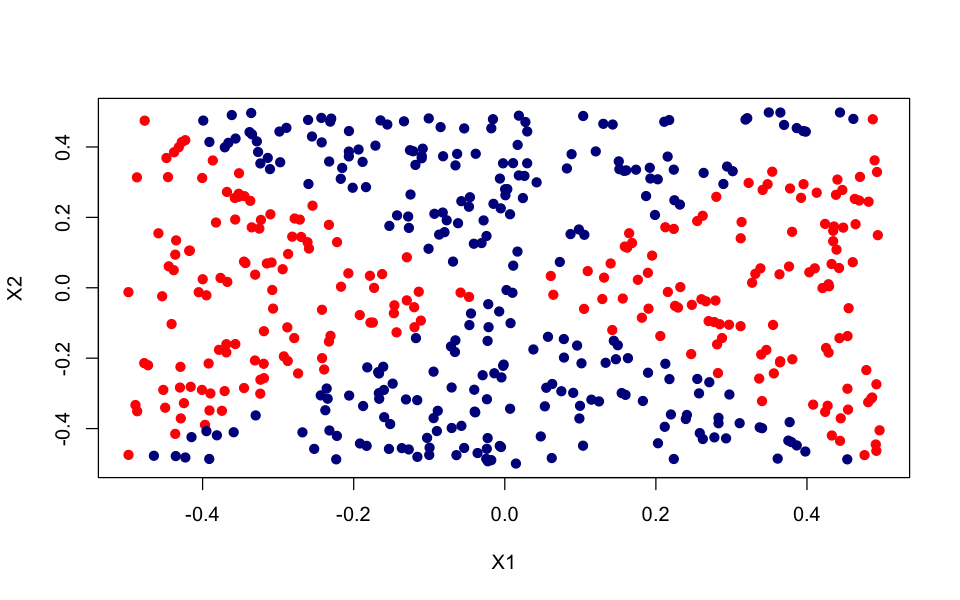

In [37]:
SVM<-svm(y~.,data=Dat,kernel="radial",cost=1000,gamma=0.5,scale=FALSE)
ypred.SVM=predict(SVM,Dat)
table(predict=ypred.SVM,truth=Dat$y)

plot(x1,x2,col = ifelse(ypred.SVM == 0,'darkblue','red'), pch = 19,xlab="X1",ylab="X2")

### Question I

The support vector classifier classifies all data in class $y=0$, whereas the SVM is able to classify 99.8% of the training data (only 1 observation in class 1 was predicted to be in class 0).

# Question 7

### Question A

In [1]:
library(ISLR)
data(Auto)

# We remove mpg and replace it by High gas, equal to 1 if mpg > median(mpg)
median(Auto$mpg)
Auto$HighGas<-ifelse(Auto$mpg>median(Auto$mpg),1,0)
Auto<-Auto[,-1]
#head(Auto)

[1] 22.75

In [42]:
Auto$HighGas<-as.factor(Auto$HighGas)
Auto$cylinders<-as.factor(Auto$cylinders)
Auto$origin<-as.factor(Auto$origin)
summary(Auto)

 cylinders  displacement     horsepower        weight      acceleration  
 3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613   Min.   : 8.00  
 4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225   1st Qu.:13.78  
 5:  3     Median :151.0   Median : 93.5   Median :2804   Median :15.50  
 6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978   Mean   :15.54  
 8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615   3rd Qu.:17.02  
           Max.   :455.0   Max.   :230.0   Max.   :5140   Max.   :24.80  
                                                                         
      year       origin                  name     HighGas
 Min.   :70.00   1:245   amc matador       :  5   0:196  
 1st Qu.:73.00   2: 68   ford pinto        :  5   1:196  
 Median :76.00   3: 79   toyota corolla    :  5          
 Mean   :75.98           amc gremlin       :  4          
 3rd Qu.:79.00           amc hornet        :  4          
 Max.   :82.00           chevrolet chevette:  4          
  

### Question B

In [49]:
tune.out.3<-tune(svm, HighGas~., data=Auto, kernel="linear",ranges=list(cost=c(0.1,1,10,100,1000,10000)))
summary(tune.out.3)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.09429487 

- Detailed performance results:
   cost      error dispersion
1 1e-01 0.09948718 0.03703652
2 1e+00 0.09429487 0.03984736
3 1e+01 0.10461538 0.04261286
4 1e+02 0.12506410 0.05047663
5 1e+03 0.11243590 0.04418915
6 1e+04 0.11243590 0.04418915


For the support vector classifier, it looks like $c=1$ gives the lowest error rate, with an error rate of $0.09$.

### Question C

In [50]:
tune.out.4<-tune(svm, HighGas~., data=Auto, kernel="radial",
                 ranges=list(cost=c(0.1,1,10,100,1000,10000),gamma=c(0.5,1,2,3,4)))
summary(tune.out.4)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     1

- best performance: 0.07653846 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-01   0.5 0.09705128 0.04793493
2  1e+00   0.5 0.07666667 0.04666463
3  1e+01   0.5 0.07916667 0.03901226
4  1e+02   0.5 0.08685897 0.04392286
5  1e+03   0.5 0.08685897 0.04392286
6  1e+04   0.5 0.08685897 0.04392286
7  1e-01   1.0 0.53820513 0.03117638
8  1e+00   1.0 0.07653846 0.04805669
9  1e+01   1.0 0.08173077 0.03968525
10 1e+02   1.0 0.08173077 0.03968525
11 1e+03   1.0 0.08173077 0.03968525
12 1e+04   1.0 0.08173077 0.03968525
13 1e-01   2.0 0.54076923 0.02733072
14 1e+00   2.0 0.11250000 0.06546086
15 1e+01   2.0 0.10474359 0.05187971
16 1e+02   2.0 0.10474359 0.05187971
17 1e+03   2.0 0.10474359 0.05187971
18 1e+04   2.0 0.10474359 0.05187971
19 1e-01   3.0 0.54076923 0.02733072
20 1e+00   3.0 0.35987179 0.15099543
21 1e+01   3.0 0.31410256 0.14514855
22

For SVM with radial kernel, it looks like the best model has $c=1$ and $\gamma=1$, with an error rate of $0.076$.

In [52]:
tune.out.5<-tune(svm, HighGas~., data=Auto, kernel="polynomial",
                 ranges=list(cost=c(0.1,1,10,100,1000,10000),degree=c(1,2,3,4,5,6)))
summary(tune.out.5)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
  cost degree
 10000      2

- best performance: 0.06141026 

- Detailed performance results:
    cost degree      error dispersion
1  1e-01      1 0.41858974 0.13258233
2  1e+00      1 0.08692308 0.03480769
3  1e+01      1 0.09961538 0.03532330
4  1e+02      1 0.09461538 0.05016155
5  1e+03      1 0.09961538 0.04288776
6  1e+04      1 0.10480769 0.03924563
7  1e-01      2 0.54615385 0.04925109
8  1e+00      2 0.54615385 0.04925109
9  1e+01      2 0.50769231 0.10138388
10 1e+02      2 0.19403846 0.12989908
11 1e+03      2 0.09205128 0.03698396
12 1e+04      2 0.06141026 0.05016027
13 1e-01      3 0.54615385 0.04925109
14 1e+00      3 0.54615385 0.04925109
15 1e+01      3 0.54615385 0.04925109
16 1e+02      3 0.39089744 0.17224126
17 1e+03      3 0.28589744 0.09017803
18 1e+04      3 0.08961538 0.05581939
19 1e-01      4 0.55115385 0.04009107
20 1e+00      4 0.55115385 0.04009107
21 1e+01      

For SVM with polynomial kernel, it looks like the best model has $c=10000$ and $d=2$, with an error rate of $0.06$.

$\textbf{Conclusion:}$ From the performance of these models, it looks like non-linearity slightly improves error rate. Indeed, the polynomial model imposes d=2, and the SVM classifier performs worse than both the SVM with radial/polynomial kernel.

### Quesiton D

#### SVM classifier

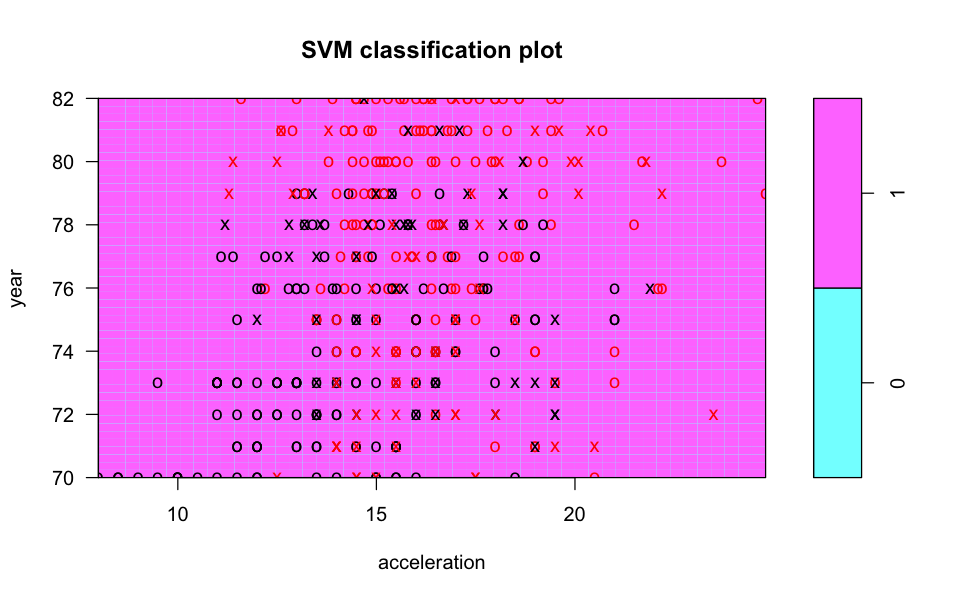

In [59]:
best.1<-tune.out.3$best.model
plot(best.1,Auto,year~acceleration)

[1] "cylinders"    "displacement" "horsepower"   "weight"       "acceleration"
[6] "year"         "origin"       "name"         "HighGas"

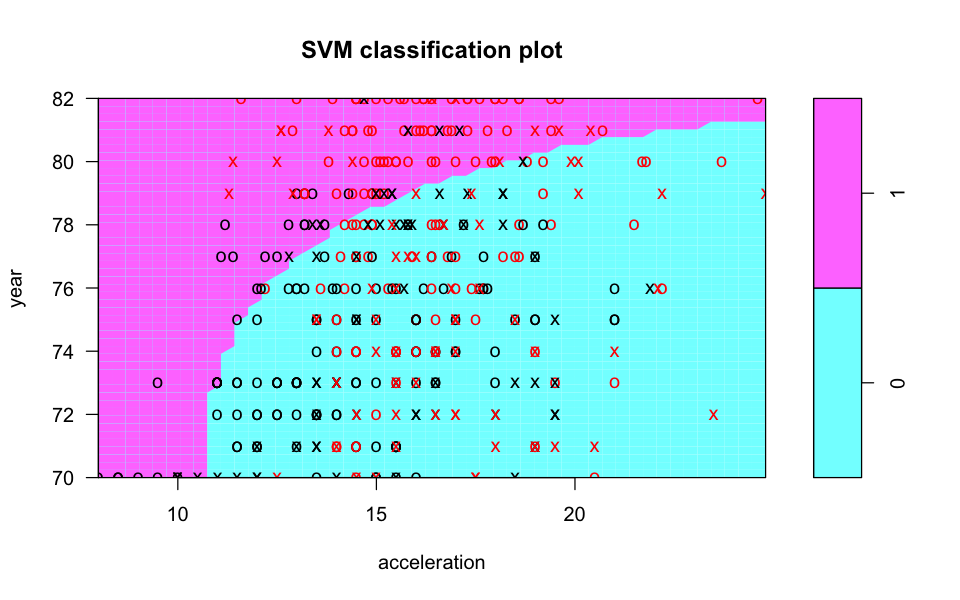

In [56]:
names(Auto)
best.2<-tune.out.5$best.model
plot(best.2,Auto,year~acceleration)

The first plot is that of the support vector classifer. The second plot is that of the support vector machine with polynomial Kernel. We see that the second plot imposes a boundary where the first does not.

# Question 8

### Question A

In [90]:
library(ISLR)
data(OJ)
set.seed(1)
OJ$StoreID<-as.factor(OJ$StoreID)
OJ$SpecialCH<-as.factor(OJ$SpecialCH)
OJ$SpecialMM<-as.factor(OJ$SpecialMM)
OJ$STORE<-as.factor(OJ$STORE)
OJ$rownumber<-1:nrow(OJ)

train<-sample(nrow(OJ),800,replace=FALSE)
OJ.Train<-OJ[train,]
OJ.Test<-OJ[-train,]

#head(OJ.Train)
#head(OJ.Test)

### Question B

In [64]:
SVC<-svm(Purchase~.,OJ.Train,kernel="linear",cost=0.01,scale=FALSE)
summary(SVC)


Call:
svm(formula = Purchase ~ ., data = OJ.Train, kernel = "linear", cost = 0.01, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.04 

Number of Support Vectors:  597

 ( 298 299 )


Number of Classes:  2 

Levels: 
 CH MM




Using these parameters, there are 597 support vectors, of which 298 are in one class, and 299 in another.

### Question C

In [66]:
train.predict.SVC<-predict(SVC,OJ.Train)
table(predict=train.predict.SVC,truth=OJ.Train$Purchase)

       truth
predict  CH  MM
     CH 445 132
     MM  49 174

On the training set, the error rate is: $\frac{49+132}{800}$~$0.226$

In [67]:
test.predict.SVC<-predict(SVC,OJ.Test)
table(predict=test.predict.SVC,truth=OJ.Test$Purchase)

       truth
predict  CH  MM
     CH 141  46
     MM  18  65

On the test set, the error rate is: $\frac{18+46}{270}$~$0.237$

### Question D

In [9]:
tune.out<-tune(svm, Purchase~., data=OJ.Train, kernel="linear",
                ranges=list(cost=c(0.01,seq(0.5, 10, by=0.5 ))))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    2

- best performance: 0.16125 

- Detailed performance results:
    cost   error dispersion
1   0.01 0.16500 0.05163978
2   0.50 0.16250 0.04526159
3   1.00 0.16375 0.04427267
4   1.50 0.16250 0.04330127
5   2.00 0.16125 0.04505013
6   2.50 0.16375 0.04505013
7   3.00 0.16375 0.04505013
8   3.50 0.16875 0.04649149
9   4.00 0.17000 0.04533824
10  4.50 0.16875 0.04535738
11  5.00 0.16750 0.04495368
12  5.50 0.16875 0.04535738
13  6.00 0.16875 0.04649149
14  6.50 0.16750 0.04866267
15  7.00 0.16750 0.04866267
16  7.50 0.16625 0.05104804
17  8.00 0.16750 0.05143766
18  8.50 0.16750 0.05143766
19  9.00 0.16875 0.04938862
20  9.50 0.16875 0.04938862
21 10.00 0.16875 0.04938862


### Question E

In [11]:
best.SVC<-tune.out$best.model

In [12]:
train.predict.best.SVC<-predict(best.SVC,OJ.Train)
table(predict=train.predict.best.SVC,truth=OJ.Train$Purchase)

       truth
predict  CH  MM
     CH 438  70
     MM  56 236

On the training set, the error rate is: $\frac{56+70}{800}$~$0.157$

In [15]:
test.predict.best.SVC<-predict(best.SVC,OJ.Test)
table(predict=test.predict.best.SVC,truth=OJ.Test$Purchase)

       truth
predict  CH  MM
     CH 140  31
     MM  19  80

On the test set, the error rate is: $\frac{19+31}{270}$~$0.185$

### Question F: support vector machine with radial kernel

### (b)

In [70]:
SVM<-svm(Purchase~.,OJ.Train,kernel="radial",cost=0.01,scale=FALSE)
summary(SVM)


Call:
svm(formula = Purchase ~ ., data = OJ.Train, kernel = "radial", cost = 0.01, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 
      gamma:  0.04 

Number of Support Vectors:  720

 ( 306 414 )


Number of Classes:  2 

Levels: 
 CH MM




Using these parameters, there are more support vectors than earlier: 720, of which 306 are in one class, and 414 in another.

### (c)

In [71]:
train.predict.SVM<-predict(SVM,OJ.Train)
table(predict=train.predict.SVM,truth=OJ.Train$Purchase)

       truth
predict  CH  MM
     CH 494 306
     MM   0   0

ERROR : 0.38

In [72]:
test.predict.SVM<-predict(SVM,OJ.Test)
table(predict=test.predict.SVM,truth=OJ.Test$Purchase)

       truth
predict  CH  MM
     CH 159 111
     MM   0   0

ERROR : 0.41

Extremely poor performance in train and test, given the classification puts everyone in CH

### (d)

In [73]:
tune.out<-tune(svm, Purchase~., data=OJ.Train, kernel="radial",
                ranges=list(cost=c(0.01,seq(0.5, 10, by=0.5 ))))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.5

- best performance: 0.165 

- Detailed performance results:
    cost   error dispersion
1   0.01 0.38250 0.04297932
2   0.50 0.16500 0.04440971
3   1.00 0.16625 0.04168749
4   1.50 0.17250 0.04281744
5   2.00 0.16875 0.04050463
6   2.50 0.17000 0.03872983
7   3.00 0.17250 0.04556741
8   3.50 0.17125 0.04489571
9   4.00 0.17000 0.04005205
10  4.50 0.16875 0.03963812
11  5.00 0.17000 0.03917553
12  5.50 0.16750 0.03736085
13  6.00 0.17000 0.03496029
14  6.50 0.17000 0.03917553
15  7.00 0.17250 0.03944053
16  7.50 0.17625 0.04387878
17  8.00 0.17500 0.04487637
18  8.50 0.17375 0.04466309
19  9.00 0.17250 0.04440971
20  9.50 0.17125 0.03821086
21 10.00 0.17125 0.03821086


### (e)

In [79]:
best.SVM<-tune.out$best.model

In [80]:
train.predict.best.SVM<-predict(best.SVM,OJ.Train)
table(predict=train.predict.best.SVM,truth=OJ.Train$Purchase)

       truth
predict  CH  MM
     CH 447  70
     MM  47 236

On the training set, the error rate is: $\frac{47+67}{800}$~$0.142$

In [81]:
test.predict.best.SVM<-predict(best.SVM,OJ.Test)
table(predict=test.predict.best.SVM,truth=OJ.Test$Purchase)

       truth
predict  CH  MM
     CH 142  29
     MM  17  82

On the test set, the error rate is: $\frac{17+29}{270}$~$0.17$

### Question G: support vector machine with polynomial kernel, degree=2

### (b)

In [82]:
SVMP<-svm(Purchase~.,OJ.Train,kernel="polynomial",cost=0.01,degree=2,scale=FALSE)
summary(SVMP)


Call:
svm(formula = Purchase ~ ., data = OJ.Train, kernel = "polynomial", 
    cost = 0.01, degree = 2, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
      gamma:  0.04 
     coef.0:  0 

Number of Support Vectors:  254

 ( 125 129 )


Number of Classes:  2 

Levels: 
 CH MM




Using these parameters, there are less support vectors than earlier: 254, of which 125 are in one class, and 129 in another.

### (c)

In [83]:
train.predict.SVMP<-predict(SVMP,OJ.Train)
table(predict=train.predict.SVMP,truth=OJ.Train$Purchase)

       truth
predict  CH  MM
     CH 410  57
     MM  84 249

ERROR : 0.176

In [84]:
test.predict.SVMP<-predict(SVMP,OJ.Test)
table(predict=test.predict.SVMP,truth=OJ.Test$Purchase)

       truth
predict  CH  MM
     CH 118  30
     MM  41  81

ERROR : 0.262

### (d)

In [85]:
tune.out<-tune(svm, Purchase~., data=OJ.Train, kernel="polynomial",degree=2,
                ranges=list(cost=c(0.01,seq(0.5, 10, by=0.5 ))))
summary(tune.out)




Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  9.5

- best performance: 0.18875 

- Detailed performance results:
    cost   error dispersion
1   0.01 0.38250 0.06800735
2   0.50 0.27250 0.04322101
3   1.00 0.23250 0.03689324
4   1.50 0.22000 0.04297932
5   2.00 0.21250 0.04409586
6   2.50 0.19875 0.03747684
7   3.00 0.19125 0.04084609
8   3.50 0.19375 0.03919768
9   4.00 0.19000 0.03717451
10  4.50 0.19250 0.03496029
11  5.00 0.19500 0.03736085
12  5.50 0.19375 0.03448530
13  6.00 0.19500 0.03395258
14  6.50 0.19750 0.03476109
15  7.00 0.19625 0.03488573
16  7.50 0.19500 0.03545341
17  8.00 0.19375 0.03738408
18  8.50 0.19375 0.03738408
19  9.00 0.19125 0.03537988
20  9.50 0.18875 0.03030516
21 10.00 0.18875 0.02972676


### (e)

In [86]:
best.SVMP<-tune.out$best.model

In [87]:
train.predict.best.SVMP<-predict(best.SVMP,OJ.Train)
table(predict=train.predict.best.SVMP,truth=OJ.Train$Purchase)

       truth
predict  CH  MM
     CH 457  88
     MM  37 218

On the training set, the error rate is: $\frac{37+88}{800}$~$0.156$

In [88]:
test.predict.best.SVMP<-predict(best.SVMP,OJ.Test)
table(predict=test.predict.best.SVMP,truth=OJ.Test$Purchase)

       truth
predict  CH  MM
     CH 145  39
     MM  14  72

On the test set, the error rate is: $\frac{13+40}{270}$~$0.196$

### Question H

All models perform similarly on test data after cross-validation of tuning parameters. However, it looks like the SVM with radial Kernel slightly outperforms if we look at the lowest error rate on test data.